# ✈️ 02 - Preparación del dataset: Split y Escalado

En este notebook continuamos el flujo del proyecto iniciado en `01_EDA-preprocessing.ipynb`, preparando el dataset limpio (`cleaned_airline_satisfaction.csv`) para el entrenamiento de modelos supervisados.

### 🎯 Objetivos:
1. Cargar el dataset limpio generado en el EDA.  
2. Separar las variables predictoras (`X`) de la variable objetivo (`y`).  
3. Codificar las variables categóricas.  
4. Dividir el dataset en subconjuntos de entrenamiento y prueba (80% / 20%).  
5. Crear versiones **escaladas** y **no escaladas** para adaptarlas a los diferentes modelos supervisados.  
6. Exportar los datasets listos para el modelado (notebooks 03_*).  

El escalado se aplicará únicamente a las variables numéricas continuas,  
ya que los algoritmos basados en árboles (como Random Forest o XGBoost) no lo requieren,  
mientras que otros modelos (SVM, KNN, Regresión Logística) sí son sensibles a la escala.


## **Paso 1: Carga del dataset limpio**

Se importa el dataset procesado en el EDA, que ya no contiene valores nulos, duplicados ni columnas irrelevantes.  
Revisamos su estructura general antes de continuar.

In [63]:
# ===================================
# 1. Import librerías y carga del dataset limpio en el EDA
# ===================================


# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from IPython.display import display, Markdown

# Configuración visual
plt.style.use('default')
sns.set_palette("Set2")
plt.rcParams["figure.figsize"] = (8,5)

# Cargar el dataset limpio
df = pd.read_csv("../data/processed/cleaned_airline_satisfaction.csv")

# Vista previa del dataset
print("✅ Dataset cargado correctamente.")
print(f"Tamaño del dataset: {df.shape}")
df.head(3)


✅ Dataset cargado correctamente.
Tamaño del dataset: (103904, 23)


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25.0,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1.0,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0.0,0.0,satisfied


## **Paso 2: Separación de variables predictoras y objetivo**

La variable objetivo es **`satisfaction`**, con dos clases:
- `"satisfied"`  
- `"neutral or dissatisfied"`

En este paso se separa el dataset en:
- **`X`** → Variables predictoras (todas las características usadas para predecir).  
- **`y`** → Variable objetivo (*target*), que en este caso es la columna `satisfaction`.  

Esta separación es esencial para el entrenamiento supervisado de los modelos.


In [64]:
# ===================================
# 2. Separación de variables predictoras y objetivo
# ===================================

# Variable objetivo
target_col = "satisfaction"

# Separar variables predictoras (X) y objetivo (y)
X = df.drop(columns=[target_col])
y = df[target_col]

# Verificar shapes
print(f"✅ Variables separadas correctamente.")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# --- Comentario interpretativo ---
display(Markdown(
"""
**💬 Interpretación:**

- La variable objetivo es **`satisfaction`**, que representa la **satisfacción del pasajero**  
  (valores: *satisfied* o *neutral/dissatisfied*).  
- Las demás columnas conforman el conjunto de características predictoras (**X**),  
  que serán utilizadas por los modelos para aprender patrones.  
- La verificación de dimensiones confirma que `y` contiene una sola columna  
  y `X` conserva todas las variables explicativas restantes.
"""
))

✅ Variables separadas correctamente.
X shape: (103904, 22)
y shape: (103904,)



**💬 Interpretación:**

- La variable objetivo es **`satisfaction`**, que representa la **satisfacción del pasajero**  
  (valores: *satisfied* o *neutral/dissatisfied*).  
- Las demás columnas conforman el conjunto de características predictoras (**X**),  
  que serán utilizadas por los modelos para aprender patrones.  
- La verificación de dimensiones confirma que `y` contiene una sola columna  
  y `X` conserva todas las variables explicativas restantes.


## **Paso 2.1: Normalización de la variable objetivo (`satisfaction`)**

Convertimos la variable objetivo `satisfaction` a formato **binario (0/1)** para garantizar compatibilidad con todos los modelos de clasificación supervisada.

- `neutral or dissatisfied` → **0**
- `satisfied` → **1**

Esta transformación es esencial para que métricas como **ROC-AUC**, **Precision**, **Recall** o **F1-score** funcionen correctamente.


In [65]:
# ===================================
# 2.1 Normalización de la variable objetivo (binaria)
# ===================================

from IPython.display import Markdown, display

# Convertimos la variable 'satisfaction' a formato binario:
# 0 → Clientes no satisfechos o neutros
# 1 → Clientes satisfechos
y = y.map({
    "neutral or dissatisfied": 0,
    "satisfied": 1
})

# Verificar la conversión y distribución de clases
print("✅ Variable objetivo normalizada correctamente.\n")
print("Conteo de clases:")
print(y.value_counts())
print("\nProporción de clases (%):")
print((y.value_counts(normalize=True) * 100).round(2))

# Mostrar explicación interpretativa debajo del resultado
display(Markdown("""
**💬 Interpretación visual:**
- La variable `satisfaction` ha sido convertida a formato **binario (0 / 1)**.
- Esto permite que todos los modelos de clasificación trabajen de forma coherente.
- Facilita el cálculo de métricas como **ROC-AUC**, **F1-score** y **Precision/Recall**.
- Los valores ahora representan:
  - `0`: Clientes *neutros o insatisfechos*.
  - `1`: Clientes *satisfechos*.
"""))





✅ Variable objetivo normalizada correctamente.

Conteo de clases:
satisfaction
0    58879
1    45025
Name: count, dtype: int64

Proporción de clases (%):
satisfaction
0    56.67
1    43.33
Name: proportion, dtype: float64



**💬 Interpretación visual:**
- La variable `satisfaction` ha sido convertida a formato **binario (0 / 1)**.
- Esto permite que todos los modelos de clasificación trabajen de forma coherente.
- Facilita el cálculo de métricas como **ROC-AUC**, **F1-score** y **Precision/Recall**.
- Los valores ahora representan:
  - `0`: Clientes *neutros o insatisfechos*.
  - `1`: Clientes *satisfechos*.


## **Paso 3: Codificación de variables categóricas**

Para utilizar el dataset en modelos supervisados de Machine Learning, las variables categóricas deben transformarse en formato numérico.

Por ello, convertimos las variables categóricas (`Gender`, `Customer Type`, `Type of Travel`, `Class`) en variables binarias mediante **One-Hot Encoding** mediante `pd.get_dummies()`, creando una nueva columna (0/1) por cada categoría posible, pero eliminando una por variable (`drop_first=True`)  para evitar multicolinealidad.

Las variables numéricas no se modifican en este paso.


In [66]:
# ===================================
# 3. Codificación de variables categóricas
# ===================================
# Para utilizar el dataset en modelos supervisados, las variables categóricas deben transformarse en formato numérico.


# Identificar variables categóricas
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Variables categóricas a codificar: {cat_cols}")


# Aplicar codificación one-hot a variables categóricas
# Codificación con get_dummies
X_encoded = pd.get_dummies(X, drop_first=True)

# Comaparar número de columnas antes y después
print("✅ Codificación completada.")
print(f"Número de columnas antes: {X.shape[1]}, después: {X_encoded.shape[1]}")

# --- Comentario interpretativo ---
display(Markdown(
"""
**💬 Interpretación:**

- Las variables categóricas detectadas se han transformado a formato binario (*0/1*).  
- El parámetro `drop_first=True` elimina una categoría de referencia para cada variable,  
  reduciendo la redundancia (evita el problema de la “trampa de las variables ficticias”).  
- El aumento en el número de columnas indica cuántas nuevas categorías se generaron tras la codificación.  
- Este paso permite que **modelos basados en valores numéricos** (como Regresión Logística, SVM, o KNN)  
  puedan interpretar correctamente estas variables.
"""
))

Variables categóricas a codificar: ['Gender', 'Customer Type', 'Type of Travel', 'Class']
✅ Codificación completada.
Número de columnas antes: 22, después: 23



**💬 Interpretación:**

- Las variables categóricas detectadas se han transformado a formato binario (*0/1*).  
- El parámetro `drop_first=True` elimina una categoría de referencia para cada variable,  
  reduciendo la redundancia (evita el problema de la “trampa de las variables ficticias”).  
- El aumento en el número de columnas indica cuántas nuevas categorías se generaron tras la codificación.  
- Este paso permite que **modelos basados en valores numéricos** (como Regresión Logística, SVM, o KNN)  
  puedan interpretar correctamente estas variables.


## **Paso 4: División del dataset en entrenamiento y prueba**

Dividimos el dataset en subconjuntos:
- **80% entrenamiento (train)** → para ajustar los modelos.  
- **20% prueba (test)** → para evaluar el rendimiento.  

La división mantiene la proporción de clases mediante `stratify=y` para evitar que el modelo aprenda con un conjunto desbalanceado.



In [67]:
# ===================================
# 4. División del dataset en entrenamiento y prueba
# ===================================


# Se realiza la división en un **80% para entrenamiento** y **20% para prueba**,
# manteniendo la proporción de clases (`stratify=y`) para evitar desbalanceo
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ División realizada correctamente.")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

# --- Interpretación visual ---
display(Markdown(
"""
**💬 Interpretación:**

- La división se ha realizado correctamente manteniendo el **equilibrio de clases**  
  gracias al parámetro `stratify=y`.  
- `X_train` y `y_train` se usarán para **entrenar y ajustar los modelos**,  
  mientras que `X_test` y `y_test` quedarán reservados para **la evaluación final**.  
- Este paso garantiza que la comparación de métricas entre modelos sea **justa y fiable**.
"""
))

✅ División realizada correctamente.
X_train: (83123, 23), X_test: (20781, 23)
y_train: (83123,), y_test: (20781,)



**💬 Interpretación:**

- La división se ha realizado correctamente manteniendo el **equilibrio de clases**  
  gracias al parámetro `stratify=y`.  
- `X_train` y `y_train` se usarán para **entrenar y ajustar los modelos**,  
  mientras que `X_test` y `y_test` quedarán reservados para **la evaluación final**.  
- Este paso garantiza que la comparación de métricas entre modelos sea **justa y fiable**.


## **Paso 5: Verificación del balanceo de clases**

Antes de entrenar cualquier modelo, es fundamental **comprobar la proporción de clases**  
en los conjuntos de *train* y *test*.  

Esto nos permite asegurar que el **split estratificado** ha mantenido la misma distribución  
de la variable objetivo (*satisfaction*) en ambos subconjuntos.  

Si los conjuntos estuvieran desbalanceados, el modelo podría aprender a **favorecer la clase mayoritaria**.

Comprobamos que la proporción entre pasajeros satisfechos y no satisfechos (clases `Satisfied` vs `Neutral or Dissatisfied`)  
se mantenga similar en los conjuntos de entrenamiento y prueba.


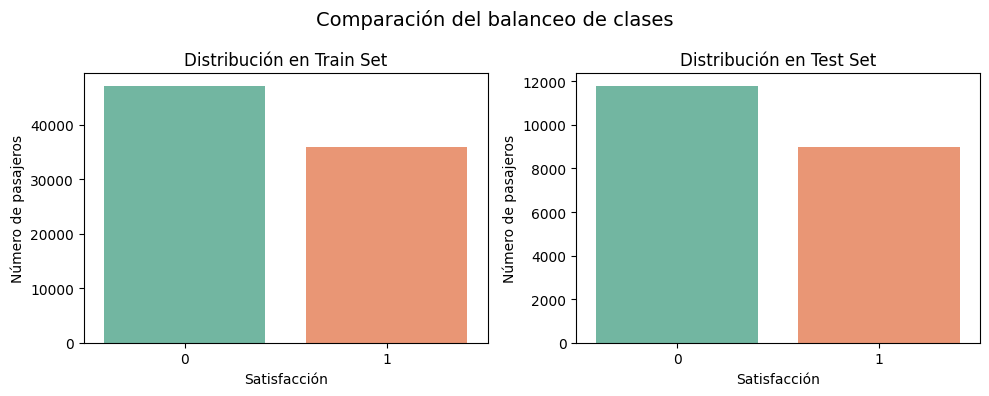

Proporción de clases en Train:
satisfaction
0    0.566666
1    0.433334
Name: proportion, dtype: float64

Proporción de clases en Test:
satisfaction
0    0.566671
1    0.433329
Name: proportion, dtype: float64



**💬 Interpretación visual:**

- Ambos gráficos muestran la proporción de clientes **satisfechos** e **insatisfechos**  
  en los subconjuntos de *train* y *test*.  
- Si las proporciones son similares, el muestreo estratificado se ha realizado correctamente.  
- En este dataset, existe un **ligero desbalanceo** (más pasajeros *neutral/insatisfechos* que *satisfechos*),  
  lo que será importante tener en cuenta durante el entrenamiento (por ejemplo, usando `class_weight='balanced'`).


In [68]:
# ===================================
# 5. Verificación del balanceo de clases
# ===================================


# Comparación de proporciones de clases en train y test
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Gráficas de barras para el conjunto de entrenamiento (Train)
sns.countplot(x=y_train, hue=y_train, ax=axes[0], palette="Set2", legend=False)
axes[0].set_title("Distribución en Train Set", fontsize=12)
axes[0].set_xlabel("Satisfacción")
axes[0].set_ylabel("Número de pasajeros")

# Gráficas de barras para el conjunto de prueba (Test)
sns.countplot(x=y_test, hue=y_test, ax=axes[1], palette="Set2", legend=False)
axes[1].set_title("Distribución en Test Set", fontsize=12)
axes[1].set_xlabel("Satisfacción")
axes[1].set_ylabel("Número de pasajeros")


plt.suptitle("Comparación del balanceo de clases", fontsize=14)
plt.tight_layout()
plt.show()

# Mostrar proporciones numéricas de clases en train y test
print("Proporción de clases en Train:")
print(y_train.value_counts(normalize=True))
print("\nProporción de clases en Test:")
print(y_test.value_counts(normalize=True))

# --- Comentario interpretativo ---
display(Markdown(
"""
**💬 Interpretación visual:**

- Ambos gráficos muestran la proporción de clientes **satisfechos** e **insatisfechos**  
  en los subconjuntos de *train* y *test*.  
- Si las proporciones son similares, el muestreo estratificado se ha realizado correctamente.  
- En este dataset, existe un **ligero desbalanceo** (más pasajeros *neutral/insatisfechos* que *satisfechos*),  
  lo que será importante tener en cuenta durante el entrenamiento (por ejemplo, usando `class_weight='balanced'`).
"""
))

## **Paso 6: Escalado de variables numéricas**

El escalado homogeniza las magnitudes de las variables numéricas continuas, garantiza que **todas las características tengan la misma escala** y ninguna domine el proceso de aprendizaje del modelo.  
 
Se aplica **StandardScaler** de `scikit-learn`, que transforma los valores para que tengan o se centren a la media en 0 y desviación estándar a 1.

- Los algoritmos basados en distancia o gradiente (**SVM, KNN, Regresión Logística**) necesitan este paso.  
- Los modelos basados en árboles (**Random Forest, XGBoost, LightGBM**) no lo requieren.  

Por ello, generaremos **dos versiones del dataset**: escalada y no escalada.

Solo se escalan las variables **numéricas continuas**, mientras que las variables categóricas codificadas (dummies) permanecen sin escalar.


In [69]:
#===================================
# 6. Escalado de variables numéricas
#===================================


# Identificar columnas numéricas (sólo éstas se escalan)
num_cols = X.select_dtypes(include=["int64", "float64"]).columns

# Inicializar el escalador
scaler = StandardScaler()

# Copiar los datasets para escalado para no sobrescribir los originales
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Aplicar escalado sólo a las columnas numéricas
X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

print("✅ Escalado aplicado correctamente.")
print(f"Número de variables escaladas: {len(num_cols)}")

# --- Comentario interpretativo ---
display(Markdown(
"""
**💬 Interpretación:**

- El escalado se ajusta **solo con los datos de entrenamiento** (`fit_transform`)  
  y se aplica **al conjunto de prueba** (`transform`) para evitar fugas de información (*data leakage*).  
- Las variables numéricas quedan ahora en una escala comparable,  
  lo que es especialmente importante para modelos que se basan en distancia  
  (como **KNN**, **SVM**, o **Regresión Logística**).  
- Los modelos basados en árboles (*Decision Tree, Random Forest, XGBoost*) no requieren escalado,  
  pero mantener datasets escalados y no escalados permite usarlos indistintamente.
"""
))

✅ Escalado aplicado correctamente.
Número de variables escaladas: 18



**💬 Interpretación:**

- El escalado se ajusta **solo con los datos de entrenamiento** (`fit_transform`)  
  y se aplica **al conjunto de prueba** (`transform`) para evitar fugas de información (*data leakage*).  
- Las variables numéricas quedan ahora en una escala comparable,  
  lo que es especialmente importante para modelos que se basan en distancia  
  (como **KNN**, **SVM**, o **Regresión Logística**).  
- Los modelos basados en árboles (*Decision Tree, Random Forest, XGBoost*) no requieren escalado,  
  pero mantener datasets escalados y no escalados permite usarlos indistintamente.


## **Paso 7: Comparación visual del escalado**

Visualizamos la distribución de una variable continua, antes y después del escalado,  
para confirmar que el `StandardScaler` ha centrado los valores en torno a 0.

El escalado de variables numéricas es fundamental para garantizar que todos los atributos  
tengan el mismo rango de valores y **no dominen el proceso de aprendizaje** de los modelos.  

Aquí se muestra la diferencia en la distribución de una variable continua (*Flight Distance*)  
antes y después del escalado.


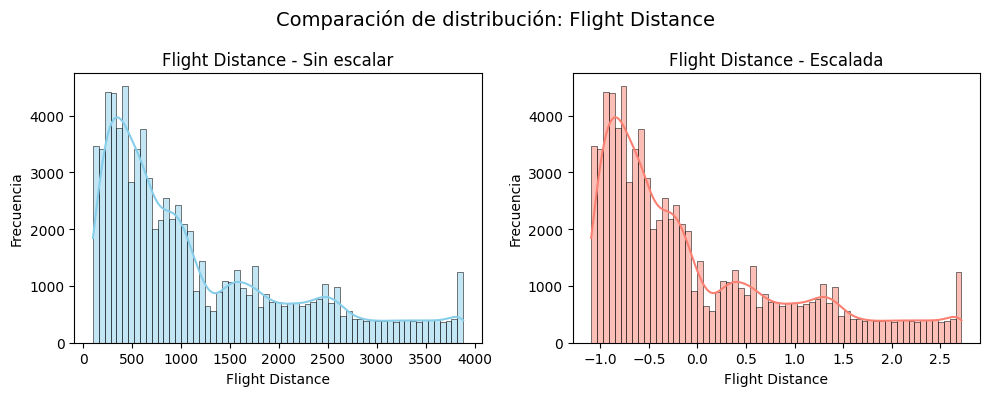


**💬 Interpretación visual:**

- El gráfico **izquierdo** muestra la distribución original de la variable *Flight Distance*,  
  donde los valores pueden tener una gran dispersión (por ejemplo, vuelos cortos y largos).  
- El gráfico **derecho** representa la misma variable **tras aplicar escalado (StandardScaler)**,  
  centrando los valores en torno a la media (0) y ajustando la desviación estándar (1).  
- Aunque la **forma de la distribución (KDE)** se mantiene, el rango cambia:  
  ahora todos los valores están normalizados, lo que permite que los modelos basados en distancia  
  (como KNN o SVM) funcionen correctamente sin que una variable domine sobre las demás.


In [70]:
#===================================
# 7. Comparación visual del escalado
#===================================

# Seleccionamos una variable continua representativa
var = "Flight Distance"  # Ejemplo de variable continua
 
# --- Gráfica de comparación ---
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Distribución original
sns.histplot(X_train[var], kde=True, ax=axes[0], color="skyblue")
axes[0].set_title(f"{var} - Sin escalar", fontsize=12)
axes[0].set_xlabel(var)
axes[0].set_ylabel("Frecuencia")

# Distribución escalada
sns.histplot(X_train_scaled[var], kde=True, ax=axes[1], color="salmon")
axes[1].set_title(f"{var} - Escalada", fontsize=12)
axes[1].set_xlabel(var)
axes[1].set_ylabel("Frecuencia")

plt.suptitle(f"Comparación de distribución: {var}", fontsize=14)
plt.tight_layout()
plt.show()

# --- Interpretación visual ---
display(Markdown(
"""
**💬 Interpretación visual:**

- El gráfico **izquierdo** muestra la distribución original de la variable *Flight Distance*,  
  donde los valores pueden tener una gran dispersión (por ejemplo, vuelos cortos y largos).  
- El gráfico **derecho** representa la misma variable **tras aplicar escalado (StandardScaler)**,  
  centrando los valores en torno a la media (0) y ajustando la desviación estándar (1).  
- Aunque la **forma de la distribución (KDE)** se mantiene, el rango cambia:  
  ahora todos los valores están normalizados, lo que permite que los modelos basados en distancia  
  (como KNN o SVM) funcionen correctamente sin que una variable domine sobre las demás.
"""
))


## **Paso 8: Exportación de datasets para modelado**

Se exportan las versiones escaladas y no escaladas del dataset,  
así como las variables objetivo correspondientes, en la carpeta `../data/processed/`.

Estos archivos se usarán en los notebooks siguientes de modelado (`03_<modelo>.ipynb`) para entrenamiento y evaluación.


In [71]:
#===================================
# 8. Exportación de datasets para modelado
#===================================


import os
os.makedirs("../data/processed", exist_ok=True)

# Exportación
X_train.to_csv("../data/processed/X_train_unscaled.csv", index=False)
X_test.to_csv("../data/processed/X_test_unscaled.csv", index=False)
X_train_scaled.to_csv("../data/processed/X_train_scaled.csv", index=False)
X_test_scaled.to_csv("../data/processed/X_test_scaled.csv", index=False)
y_train.to_csv("../data/processed/y_train.csv", index=False)
y_test.to_csv("../data/processed/y_test.csv", index=False)

print("✅ Datasets exportados correctamente:")
print("- ../data/processed/X_train_unscaled.csv")
print("- ../data/processed/X_test_unscaled.csv")
print("- ../data/processed/X_train_scaled.csv")
print("- ../data/processed/X_test_scaled.csv")
print("- ../data/processed/y_train.csv")
print("- ../data/processed/y_test.csv")


✅ Datasets exportados correctamente:
- ../data/processed/X_train_unscaled.csv
- ../data/processed/X_test_unscaled.csv
- ../data/processed/X_train_scaled.csv
- ../data/processed/X_test_scaled.csv
- ../data/processed/y_train.csv
- ../data/processed/y_test.csv


# 🏁 **Conclusiones división dataset**

- El dataset ha sido dividido correctamente en subconjuntos de entrenamiento (80%) y prueba (20%), manteniendo el balanceo de clases.
- Las proporciones de clases se mantienen equilibradas.  

Además, se han generado dos versiones del conjunto de datos:

- **Escalado:** para algoritmos sensibles a la magnitud de las variables (SVM, KNN, Regresión Logística).  
- **No escalado:** para modelos basados en árboles (Decision Tree, Random Forest, XGBoost, LightGBM).

Estos datasets se encuentran exportados en la carpeta `../data/processed/` y listos para el modelado en los siguientes notebooks:

📘 **`03_<modelo>.ipynb`** — Entrenamiento, validación cruzada y tuning de hiperparámetros.
